21064051-NguyenHungAnh

2.1 Image filtering

2.1.1 Convolution

ex2.1

In [1]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt

In [2]:
# Đọc ảnh
image = cv2.imread('C:/Users/Student/Downloads/download.JFIF')

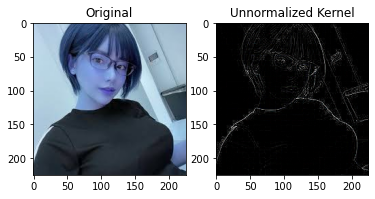

In [3]:
# Kernel không chuẩn hóa
kernel = np.array([[0, -1, 0], 
                   [-1, 4, -1], 
                   [0, -1, 0]])

# Áp dụng convolution
output = cv2.filter2D(image, -1, kernel)

# Hiển thị ảnh
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(output, cmap='gray'), plt.title('Unnormalized Kernel')
plt.show()

ex2.2

In [4]:
image1 = cv2.imread('whitesquare.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('hop.jpg', cv2.IMREAD_GRAYSCALE)

# Các kernel
h1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])  # Identity kernel
h2 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1]])  # Shift kernel
h3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])  # Sharpen kernel
h4 = (1/16) * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])  # Gaussian blur
kernels = [h1, h2, h3, h4]
kernel_names = ['h1 - Identity', 'h2 - Shift', 'h3 - Sharpen', 'h4 - Gaussian Blur']

In [5]:
# Hàm áp dụng các kernel lên ảnh và hiển thị kết quả
def apply_kernels(image, kernels, kernel_names):
    fig, axs = plt.subplots(1, len(kernels)+1, figsize=(12, 4))
    
    # Hiển thị ảnh gốc
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # Áp dụng từng kernel
    for i, kernel in enumerate(kernels):
        result = cv2.filter2D(image, -1, kernel)
        axs[i+1].imshow(result, cmap='gray')
        axs[i+1].set_title(kernel_names[i])
        axs[i+1].axis('off')

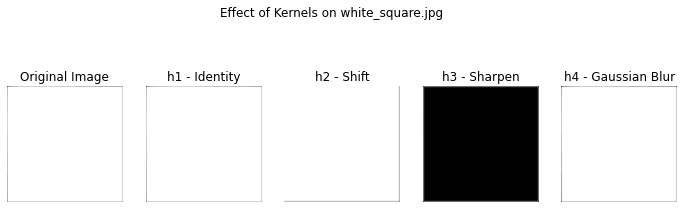

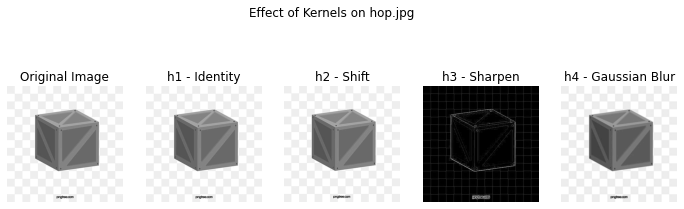

In [6]:
# Áp dụng lên ảnh "white_square.jpg"
apply_kernels(image1, kernels, kernel_names)
plt.suptitle('Effect of Kernels on white_square.jpg')
plt.show()

# Áp dụng lên ảnh "hop.jpg"
apply_kernels(image2, kernels, kernel_names)
plt.suptitle('Effect of Kernels on hop.jpg')
plt.show()

2.1.2 Box blur

ex2.3

Điều này được thực hiện bằng cách tích chập hình ảnh với bộ lọc hộp chuẩn hóa. Nó chỉ đơn giản lấy giá trị trung bình của tất cả các điểm ảnh bên dưới vùng hạt nhân và thay thế phần tử trung tâm.

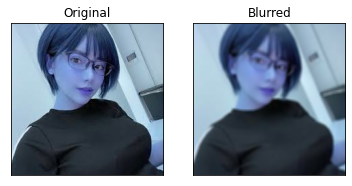

In [7]:
blur = cv2.blur(image,(5,5))
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

2.1.3 Gaussian filtering in OpenCV

Trong trường hợp này, thay vì bộ lọc hộp, hạt nhân Gaussian được sử dụng. Nó được thực hiện bằng hàm cv.GaussianBlur(). Chúng ta nên chỉ định chiều rộng và chiều cao của hạt nhân, phải là số dương và số lẻ.

Ex. 2.4

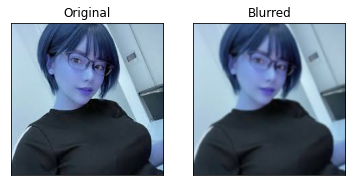

In [8]:
blur = cv2.GaussianBlur(image,(5,5),0)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

2.1.4 Median filter

Ở đây, hàm cv.medianBlur() lấy trung vị của tất cả các pixel bên dưới vùng hạt nhân và phần tử trung tâm được thay thế bằng giá trị trung vị này.

Ex. 2.4

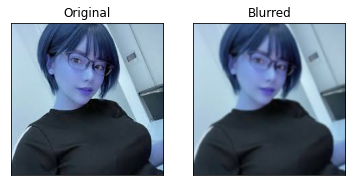

In [9]:
median = cv2.medianBlur(image,5)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

2.1.5 Bilateral filter

cv.bilateralFilter() có hiệu quả cao trong việc loại bỏ nhiễu trong khi vẫn giữ cho các cạnh sắc nét. Nhưng thao tác này chậm hơn so với các bộ lọc khác.

Ex. 2.5

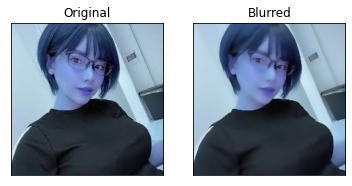

In [10]:
blur = cv2.bilateralFilter(image,9,75,75)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

2.3 Image sharpening

Ex. 2.9

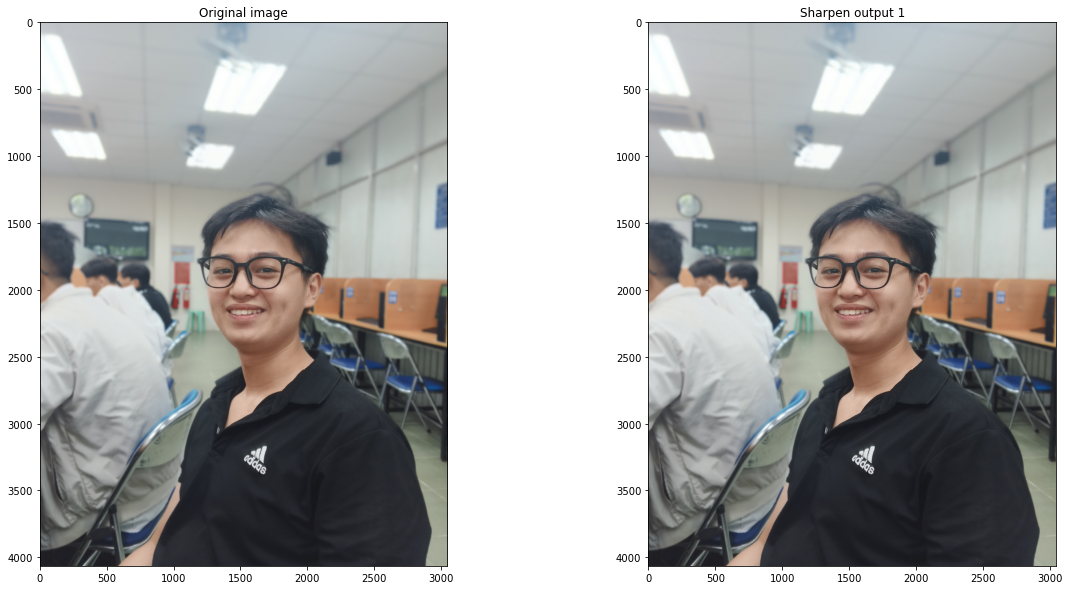

In [11]:
# Đọc ảnh
image = cv2.imread('C:/Users/Student/Downloads/IMG_20240926_103115_915.JPG')
# Sharpen kernel
sharpen = np.array(( [0, -1, 0],
 [-1, 5, -1],
 [0, -1, 0]), dtype="int")
sharpImg = cv2.filter2D(image, -1, sharpen)
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original image")
plt.subplot(122);plt.imshow(sharpImg[...,::-1]);plt.title("Sharpen output 1")
plt.show()

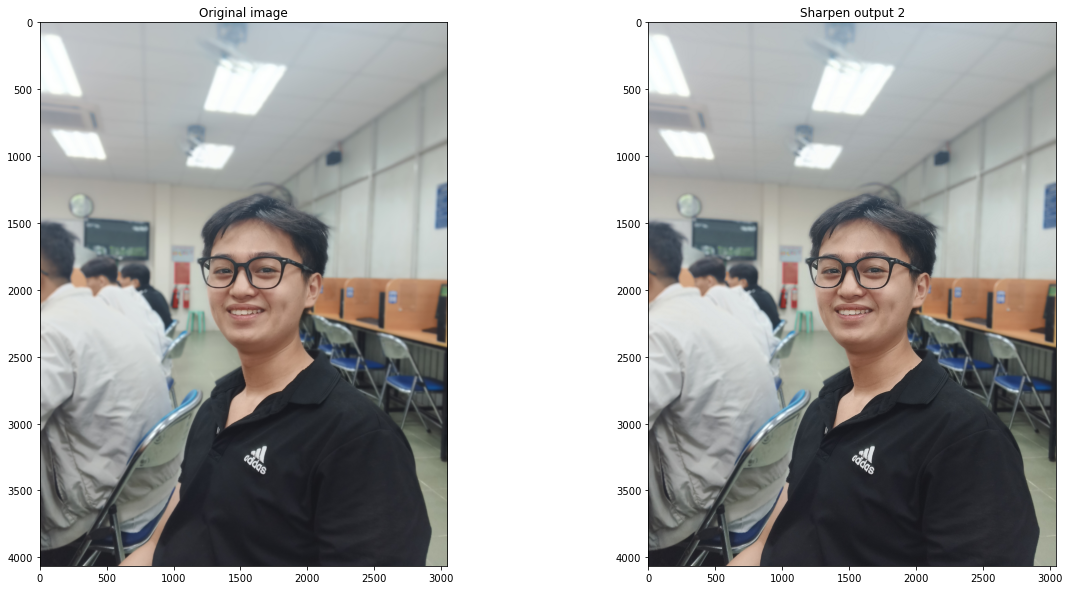

In [12]:
# Đọc ảnh
image = cv2.imread('C:/Users/Student/Downloads/IMG_20240926_103115_915.JPG')
# Sharpen kernel
sharpen = np.array(( [-1, -1, -1],
 [-1, 9, -1],
 [-1, -1, -1]), dtype="int")
sharpImg = cv2.filter2D(image, -1, sharpen)
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original image")
plt.subplot(122);plt.imshow(sharpImg[...,::-1]);plt.title("Sharpen output 2")
plt.show()

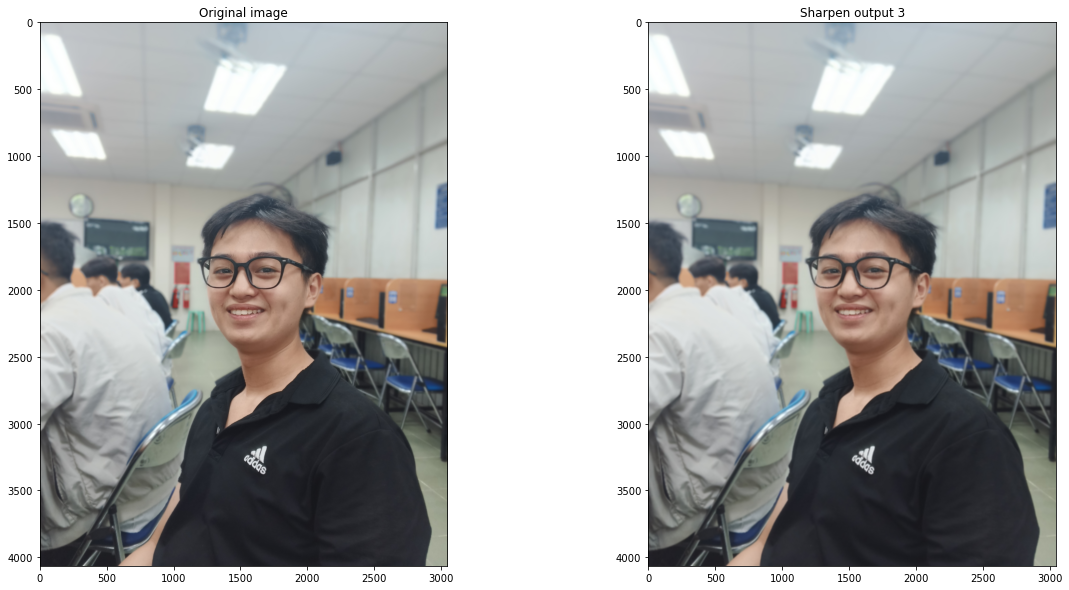

In [13]:
# Đọc ảnh
image = cv2.imread('C:/Users/Student/Downloads/IMG_20240926_103115_915.JPG')
# Sharpen kernel
sharpen = np.array(( [1, 1, 1],
 [1, -7, 1],
 [1, 1, 1]), dtype="int")
sharpImg = cv2.filter2D(image, -1, sharpen)
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original image")
plt.subplot(122);plt.imshow(sharpImg[...,::-1]);plt.title("Sharpen output 3")
plt.show()